In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [3]:
print(aisles.shape)
print(departments.shape)
print(orders.shape)
print(products.shape)
print(order_products_prior.shape)
print(order_products_train.shape)

(134, 2)
(21, 2)
(3421083, 7)
(49688, 4)
(32434489, 4)
(1384617, 4)


In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Checking for NaN Values

In [10]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [11]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

In [12]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [13]:
order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [14]:
order_products_train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [15]:
orders.isna().sum()

# the NaN values in days_since_prior_order signify that its their first order or have more than 30 days hence it is an important field

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

## Analysing Products

In [16]:
# We can find the each product in its respective aisle and department

print(products.aisle_id.nunique())
print(products.department_id.nunique())
# There are 21 unique department_id in department as well as products data 
# There are 134 unique aisles_id in aisles as well as products data 

134
21


In [17]:
# This means every product belongs to one department and one aisle and the data can be merged

products_belong_to_aisles = pd.merge(products, aisles, on = 'aisle_id', how = 'left')
products_belong_to_aisles_belong_to_dept = pd.merge(products_belong_to_aisles, departments, on = 'department_id', how = 'left')
products_belong_to_aisles_belong_to_dept.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


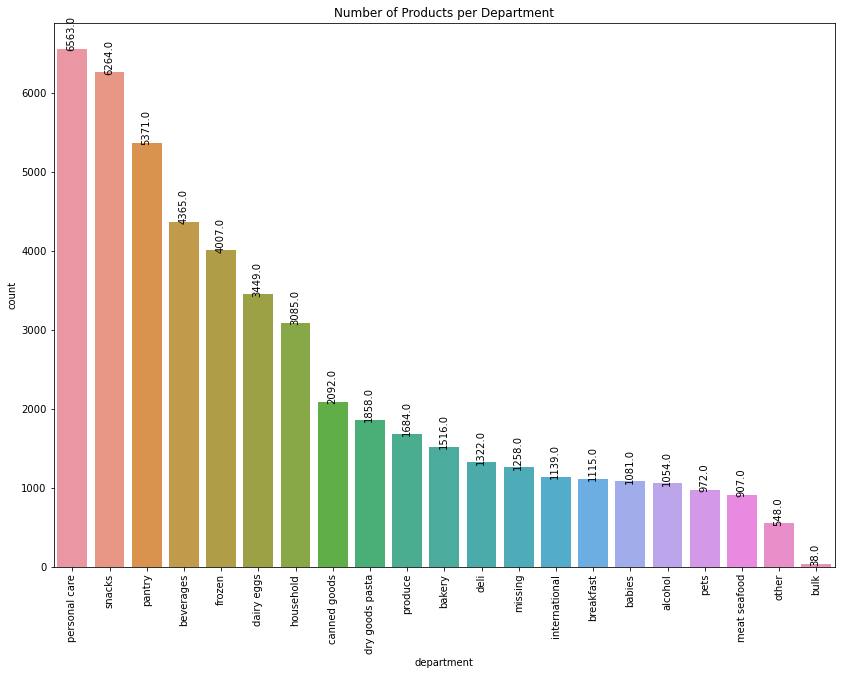

In [18]:
# Products per department

plt.figure(figsize = (14,10))
ax=sns.countplot(data= products_belong_to_aisles_belong_to_dept, x='department', order = products_belong_to_aisles_belong_to_dept.department.value_counts().index)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), rotation=90)
plt.title('Number of Products per Department')
plt.xticks(rotation=90)
plt.show()
# We can see that 1258 products have missing department

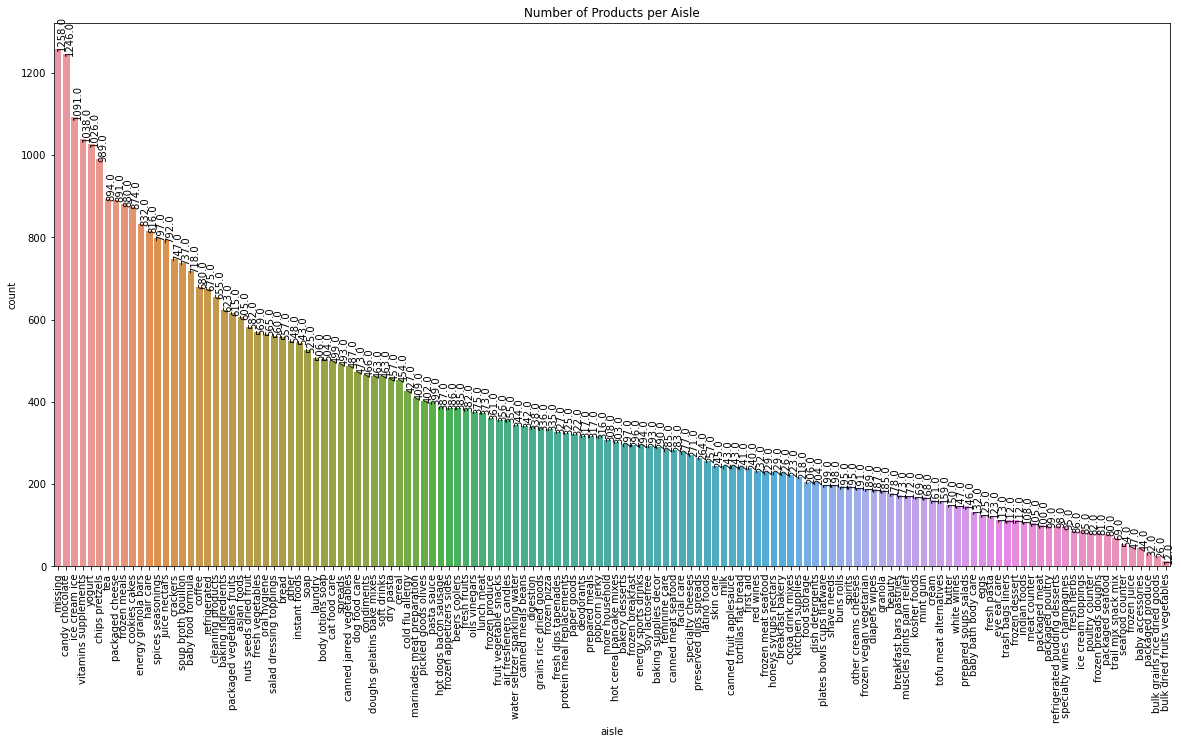

In [19]:
# Products per Aisle

plt.figure(figsize = (20,10))
ax=sns.countplot(data= products_belong_to_aisles, x='aisle', order = products_belong_to_aisles.aisle.value_counts().index)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), rotation=90)
plt.title('Number of Products per Aisle')
plt.xticks(rotation=90)
plt.show()
# We can see that 1258 products have 

In [20]:
print(aisles[aisles['aisle']=='missing'])
print("\n")
print(departments[departments['department']=='missing'])
print("\n")
# Aisle 100 and Department 21 have missing information

print(products_belong_to_aisles_belong_to_dept[products_belong_to_aisles_belong_to_dept['aisle']=='missing'])
#1258 products have missing aisle and department number

    aisle_id    aisle
99       100  missing


    department_id department
20             21    missing


       product_id                                       product_name  \
37             38                    Ultra Antibacterial Dish Liquid   
71             72                          Organic Honeycrisp Apples   
109           110                             Uncured Turkey Bologna   
296           297  Write Bros Ball Point Pens, Cap-Pen, Medium (1...   
416           417         Classics Baby Binks Easter Chocolate Bunny   
...           ...                                                ...   
49552       49553                                 Organic Plain Skyr   
49574       49575                     Chocolate Vanilla Malt Custard   
49640       49641                                      8\" Pecan Pie   
49663       49664                     Lemon Cayenne Drinking Vinegar   
49668       49669                                   K Cup Dark Blend   

       aisle_id  department_i

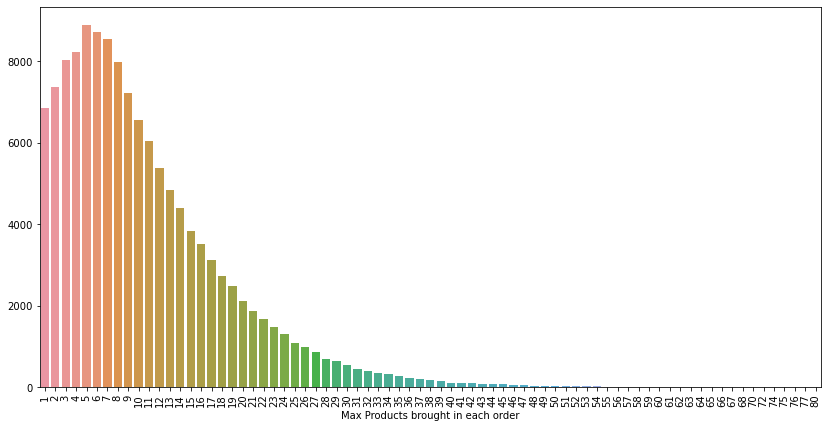

In [21]:
# Max Products brought in each order
df1 = order_products_train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
prod_count = df1.add_to_cart_order.value_counts()
plt.figure(figsize=(14,7))
sns.barplot(x=prod_count.index, y=prod_count.values)
plt.xlabel('Max Products brought in each order')
plt.xticks(rotation=90)
plt.show()

# This shows that 5 products are broght in each order has the highest value. So maximum people buy 5 products and it gradually decreses. 

In [22]:
order_products_prior_new = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior_new = pd.merge(order_products_prior_new, aisles, on='aisle_id', how='left')
order_products_prior_new = pd.merge(order_products_prior_new, departments, on='department_id', how='left')
order_products_prior_new.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [23]:
# Which products are brought most number of times
product_brought_count = order_products_prior_new['product_name'].value_counts().reset_index().head(20)
product_brought_count.columns = ['product_name', 'frequency_count']
product_brought_count

# This shows us that banana is the most bought product 

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


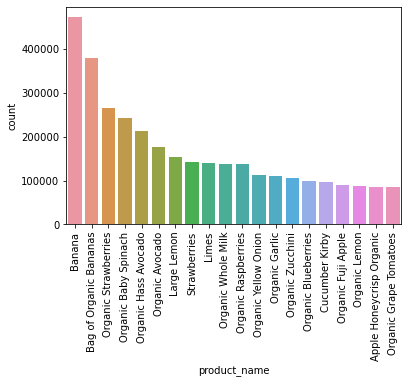

In [24]:
sns.countplot(data= order_products_prior_new, x='product_name', order = order_products_prior_new.product_name.value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

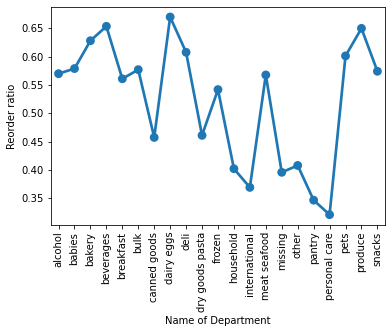

In [25]:
df2 = order_products_prior_new.groupby(["department"])["reordered"].aggregate("mean").reset_index()

sns.pointplot(x=df2['department'].values, y=df2['reordered'].values)
plt.ylabel('Reorder ratio')
plt.xlabel('Name of Department')
plt.xticks(rotation=90)
plt.show()

# It shows that personal care has the least re-order ratio



```
# This is formatted as code
```

# Analysing Orders

Text(0.5, 0, 'Hour of the day')

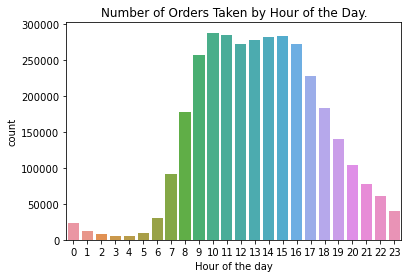

In [26]:
# Analysing orders by the time of the day on a 24-hours scale
sns.countplot(data= orders, x='order_hour_of_day')
plt.title('Number of Orders Taken by Hour of the Day.')
plt.xlabel('Hour of the day')
# We can see that between morning 9am to evening 5pm maximum orders are taken.

Text(0.5, 0, 'Day')

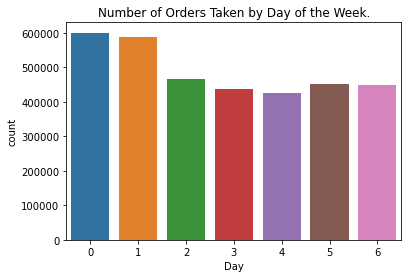

In [27]:
# Orders according to day of the week
sns.countplot(data= orders, x='order_dow' )
plt.title('Number of Orders Taken by Day of the Week.')
plt.xlabel('Day')
# Maximum orders are taken on monday or tuesday and gradually decrese as the week progresses

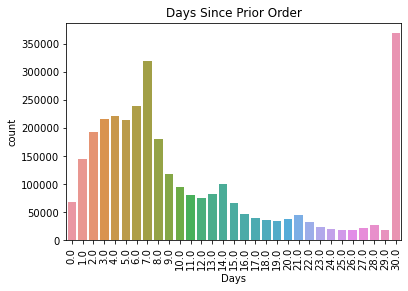

In [28]:
# Re-order number of days
sns.countplot(data= orders, x='days_since_prior_order')
plt.title('Days Since Prior Order')
plt.xlabel('Days')
plt.xticks(rotation=90)
plt.show()

# We can see that people often re-order within a week
# Highest at 30 means people more after 30 or more days

<AxesSubplot:xlabel='order_hour_of_day', ylabel='order_dow'>

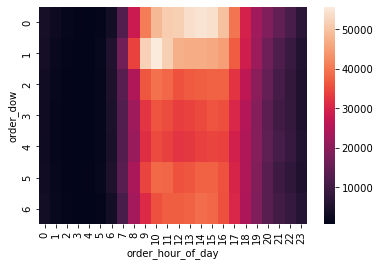

In [29]:
# Relation between day of the week and time of the day with the help of heatmap
df3 = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
df3 = df3.pivot('order_dow', 'order_hour_of_day', 'order_number')
sns.heatmap(df3)

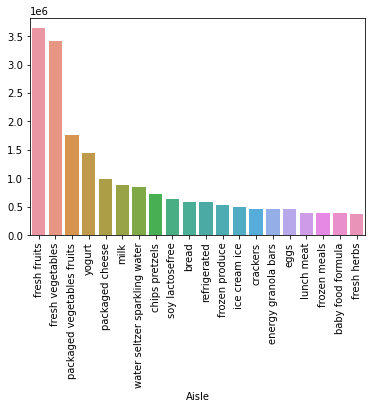

In [30]:
aisle_count = order_products_prior_new['aisle'].value_counts().head(20)
sns.barplot(x=aisle_count.index, y=aisle_count.values)
plt.xlabel('Aisle')
plt.xticks(rotation=90)
plt.show()

# Maximum number of products are ordered from fresh fruit section

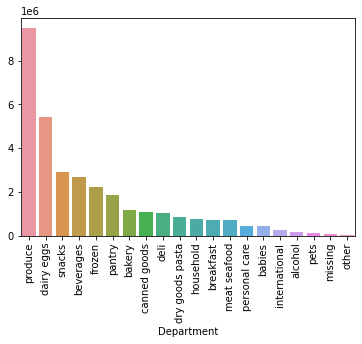

In [31]:
department_count = order_products_prior_new['department'].value_counts().head(20)
sns.barplot(x=department_count.index, y=department_count.values)
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.show()

# Most number of products are ordered the produce department

# PRE-PROCESSING

In [32]:
merged_order_products = pd.merge(order_products_train, order_products_prior, how = 'outer')

In [33]:
order_products_desc = pd.merge(merged_order_products, products_belong_to_aisles_belong_to_dept, on = 'product_id')

In [34]:
merged_orders = pd.merge(orders, order_products_desc, on = 'order_id')
merged_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
2,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
3,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
4,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks


In [35]:
# Creating the test set of orders
test = orders[orders['eval_set']=='test']
test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [36]:
test.shape

(75000, 7)

In [37]:
user_info = merged_orders[['user_id', 'order_number', 'order_dow', 'order_hour_of_day', 
                           'days_since_prior_order', 'aisle']]

In [38]:
user_data = pd.get_dummies(user_info, prefix=None, columns=['aisle'])

In [39]:
user_data.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
user_data['user_id'].nunique()

206209

In [41]:
user_data1 = user_data[user_data['user_id'] <= 34368]
user_data2 = user_data[(user_data['user_id'] <= 68736) & (user_data['user_id'] > 34368)]
user_data3 = user_data[(user_data['user_id'] <= 103104) & (user_data['user_id'] > 68736)]
user_data4 = user_data[(user_data['user_id'] <= 137472) & (user_data['user_id'] > 103104)]
user_data5 = user_data[(user_data['user_id'] <= 171840) & (user_data['user_id'] > 137472)]
user_data6 = user_data[user_data['user_id'] > 171840]

In [42]:
grouped_user1 = user_data1.groupby('user_id').sum()

In [43]:
grouped_user2 = user_data2.groupby('user_id').sum()

In [44]:
grouped_user3 = user_data3.groupby('user_id').sum()

In [45]:
grouped_user4 = user_data4.groupby('user_id').sum()

In [46]:
grouped_user5 = user_data5.groupby('user_id').sum()

In [47]:
grouped_user6 = user_data6.groupby('user_id').sum()

In [48]:
user_data1_noaisles = user_data1.iloc[:,:5]
user_data2_noaisles = user_data2.iloc[:,:5]
user_data3_noaisles = user_data3.iloc[:,:5]
user_data4_noaisles = user_data4.iloc[:,:5]
user_data5_noaisles = user_data5.iloc[:,:5]
user_data6_noaisles = user_data6.iloc[:,:5]

In [49]:
group1 = user_data1_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group2 = user_data2_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group3 = user_data3_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group4 = user_data4_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group5 = user_data5_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group6 = user_data6_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})

In [50]:
grouped_user1['num_orders'] = group1.order_number
grouped_user2['num_orders'] = group2.order_number
grouped_user3['num_orders'] = group3.order_number
grouped_user4['num_orders'] = group4.order_number
grouped_user5['num_orders'] = group5.order_number
grouped_user6['num_orders'] = group6.order_number

In [51]:
grouped_user1['mean_days_since'] = group1.days_since_prior_order
grouped_user2['mean_days_since'] = group2.days_since_prior_order
grouped_user3['mean_days_since'] = group3.days_since_prior_order
grouped_user4['mean_days_since'] = group4.days_since_prior_order
grouped_user5['mean_days_since'] = group5.days_since_prior_order
grouped_user6['mean_days_since'] = group6.days_since_prior_order

In [52]:
grouped_user1['mode_order_dow'] = group1.order_dow
grouped_user2['mode_order_dow'] = group2.order_dow
grouped_user3['mode_order_dow'] = group3.order_dow
grouped_user4['mode_order_dow'] = group4.order_dow
grouped_user5['mode_order_dow'] = group5.order_dow
grouped_user6['mode_order_dow'] = group6.order_dow

In [53]:
grouped_user1['median_order_hour'] = group1.order_hour_of_day
grouped_user2['median_order_hour'] = group2.order_hour_of_day
grouped_user3['median_order_hour'] = group3.order_hour_of_day
grouped_user4['median_order_hour'] = group4.order_hour_of_day
grouped_user5['median_order_hour'] = group5.order_hour_of_day
grouped_user6['median_order_hour'] = group6.order_hour_of_day

In [54]:
grouped_user1.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user2.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user3.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user4.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user5.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user6.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)

In [55]:
grouped_users = pd.concat([grouped_user1, grouped_user2, grouped_user3, grouped_user4, grouped_user5, grouped_user6], axis=0)

In [56]:
grouped_users.head()

,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,aisle_baking ingredients,aisle_baking supplies decor,aisle_beauty,aisle_beers coolers,...,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,num_orders,mean_days_since,mode_order_dow,median_order_hour
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,11,19.200000,4,8.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,42.0,15,18.009390,1,10.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,12,11.487179,0,16.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,5,15.357143,4,13.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,5,12.314286,0,16.0


In [57]:
cols = grouped_users.columns.tolist()
last_4_cols = cols[-4:]
new_cols = last_4_cols + cols[:-4]
grouped_users = grouped_users[new_cols]

In [58]:
grouped_users.head()

,num_orders,mean_days_since,mode_order_dow,median_order_hour,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,19.200000,4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,15,18.009390,1,10.0,0.0,3.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,12,11.487179,0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,5,15.357143,4,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,12.314286,0,16.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
users_sc = sc.fit_transform(grouped_users)

# K-MEANS CLUSTERING

In [60]:
from sklearn.cluster import KMeans

k_means_5 = KMeans(n_clusters=5, random_state=1).fit(users_sc)
k_means_7 = KMeans(n_clusters=7, random_state=1).fit(users_sc)
k_means_10 = KMeans(n_clusters=10, random_state=1).fit(users_sc)
k_means_12 = KMeans(n_clusters=12, random_state=1).fit(users_sc)
k_means_15 = KMeans(n_clusters=15, random_state=1).fit(users_sc)
k_means_17 = KMeans(n_clusters=17, random_state=1).fit(users_sc)
k_means_20 = KMeans(n_clusters=20, random_state=1).fit(users_sc)
k_means_22 = KMeans(n_clusters=22, random_state=1).fit(users_sc)
k_means_25 = KMeans(n_clusters=25, random_state=1).fit(users_sc)
k_means_30 = KMeans(n_clusters=30, random_state=1).fit(users_sc)

In [61]:
k_list = [k_means_5, k_means_7, k_means_10, k_means_12, k_means_15, k_means_17, k_means_20, k_means_22, k_means_25, k_means_30]

In [62]:
ss = []

for model in k_list:
    labels = model.labels_
    ss.append(model.inertia_)

Text(0.5, 0, 'K')

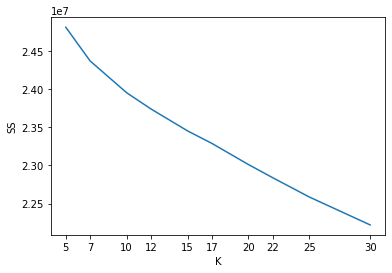

In [63]:
plt.plot([5,7,10,12,15,17,20,22,25,30], ss)
plt.xticks([5,7,10,12,15,17,20,22,25,30])
plt.ylabel('SS')
plt.xlabel('K')

In [66]:
from sklearn import metrics
metrics.silhouette_score(grouped_users, k_means_5.labels_, sample_size = 50000, random_state = 1)

0.3173296185937644

In [67]:
metrics.silhouette_score(grouped_users, k_means_7.labels_, sample_size = 50000, random_state = 1)

0.3077369009350691

In [68]:
metrics.silhouette_score(grouped_users, k_means_10.labels_, sample_size = 50000, random_state = 1)

0.26420502325078693

In [69]:
metrics.silhouette_score(grouped_users, k_means_12.labels_, sample_size = 50000, random_state = 1)

0.20505427799097842

In [70]:
metrics.silhouette_score(grouped_users, k_means_15.labels_, sample_size = 50000, random_state = 1)

-0.042801123604910396

In [71]:
metrics.silhouette_score(grouped_users, k_means_17.labels_, sample_size = 50000, random_state = 1)

-0.041330071456377133

In [72]:
metrics.silhouette_score(grouped_users, k_means_20.labels_, sample_size = 50000, random_state = 1)

-0.043521489081090915

In [73]:
metrics.silhouette_score(grouped_users, k_means_22.labels_, sample_size = 50000, random_state = 1)

-0.05447704438862344

In [74]:
metrics.silhouette_score(grouped_users, k_means_25.labels_, sample_size = 50000, random_state = 1)

-0.04660930619205662

In [75]:
metrics.silhouette_score(grouped_users, k_means_30.labels_, sample_size = 50000, random_state = 1)

-0.04706291181598686

In [76]:
grouped_users['cluster'] = k_means_7.labels_

In [77]:
grouped_users.cluster.value_counts()

0    136990
4     45902
1     13708
5      4153
6      3140
3      1555
2       761
Name: cluster, dtype: int64

In [78]:
pickle.dump(grouped_users, open('clustered_users.p', 'wb'))

In [79]:
grouped_users.head()

,num_orders,mean_days_since,mode_order_dow,median_order_hour,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,19.200000,4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,15,18.009390,1,10.0,0.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0,4
3,12,11.487179,0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
4,5,15.357143,4,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,5,12.314286,0,16.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0


# TSNE TO CONVERT CLUSTER DATA

In [113]:
cluster_data = grouped_users.groupby('cluster').median()

In [114]:
from sklearn.manifold import TSNE
cluster_embedded = TSNE(n_components=2).fit_transform(cluster_data)

In [115]:
cluster_embedded_df = pd.DataFrame(cluster_embedded, index = cluster_data.index, columns = ['1','2'])
cluster_embedded_df.reset_index(inplace=True)
cluster_embedded_df

,cluster,1,2
0,0,27.968298,-36.432934
1,1,-21.081766,-185.376434
2,2,-125.545670,-68.426003
3,3,-107.074341,-157.057373
4,4,46.439541,-125.064217
5,5,-39.553066,-96.745071
6,6,-58.024288,-8.113744


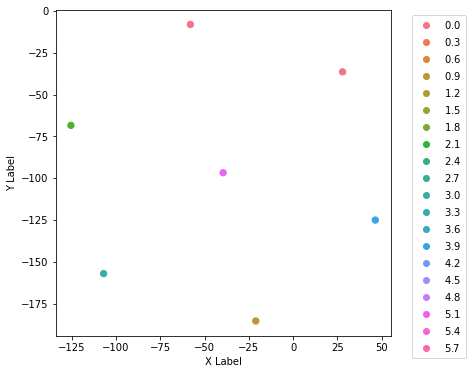

In [116]:
import re, seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
#ax = Axes3D(fig)
ax = fig.add_subplot(1, 1, 1)
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
w
# plot
sc = ax.scatter(cluster_embedded_df['1'], cluster_embedded_df['2'],  
                s=40, c=cluster_embedded_df['cluster'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# legend
plt.legend(*sc.legend_elements(num=20), bbox_to_anchor=(1.05, 1), loc=2)


In [121]:
cluster_embedded = TSNE(n_components=2).fit_transform(grouped_users)

In [139]:
cluster_embedded_df_points = pd.DataFrame(cluster_embedded, index = grouped_users["cluster"], columns = ['1','2'])
cluster_embedded_df_points.reset_index(inplace=True)

In [182]:
grouped = cluster_embedded_df_points.groupby('cluster')
sampled = grouped.apply(lambda x: x.head(100))
cluster_embedded_df_points1 = sampled.reset_index(drop=True)
cluster_embedded_df_points1

,cluster,1,2
0,0,-10.475213,15.527330
1,0,-8.057420,-0.706115
2,0,19.142038,10.120033
3,0,8.443604,12.470429
4,0,12.762552,19.366312
...,...,...,...
695,6,31.341236,17.647442
696,6,3.788164,30.934587
697,6,30.848192,17.300869
698,6,30.362291,10.400950


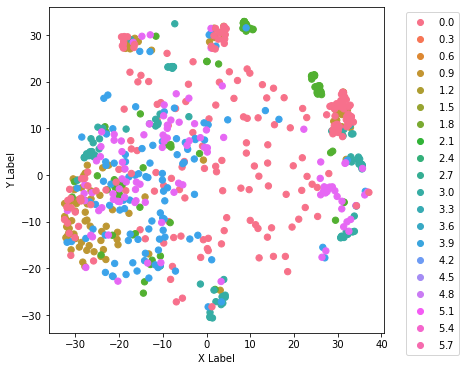

In [184]:
import re, seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
#ax = Axes3D(fig)
ax = fig.add_subplot(1, 1, 1)
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
# plot
sc = ax.scatter(cluster_embedded_df_points1['1'], cluster_embedded_df_points1['2'],  
                s=40, c=cluster_embedded_df_points1['cluster'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# legend
plt.legend(*sc.legend_elements(num=20), bbox_to_anchor=(1.05, 1), loc=2)


In [186]:
grouped = cluster_embedded_df_points.groupby('cluster')
sampled = grouped.apply(lambda x: x.head(100))
cluster_embedded_df_points1 = sampled.reset_index(drop=True)
cluster_embedded_df_points1

,cluster,1,2
0,0,-10.475213,15.527330
1,0,-8.057420,-0.706115
2,0,19.142038,10.120033
3,0,8.443604,12.470429
4,0,12.762552,19.366312
...,...,...,...
695,6,31.341236,17.647442
696,6,3.788164,30.934587
697,6,30.848192,17.300869
698,6,30.362291,10.400950


In [188]:
cluster_embedded = TSNE(n_components=3).fit_transform(cluster_embedded_df_points1)

(700, 3)

In [190]:
cluster_embedded_df_points = pd.DataFrame(cluster_embedded, index = cluster_embedded_df_points1["cluster"], columns = ['1','2','3'])
cluster_embedded_df_points.reset_index(inplace=True)

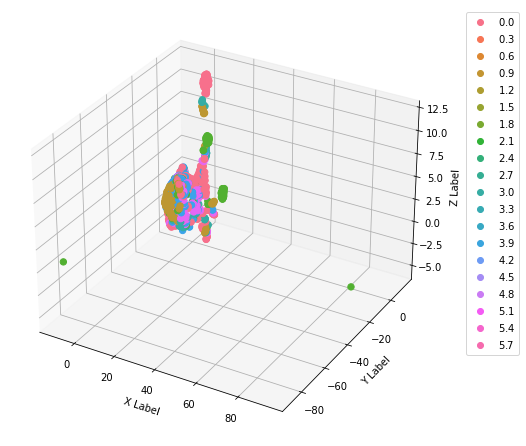

In [191]:
import re, seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(cluster_embedded_df_points['1'], cluster_embedded_df_points['2'], cluster_embedded_df_points['3'], 
                s=40, c=cluster_embedded_df_points['cluster'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(num=20), bbox_to_anchor=(1.05, 1), loc=2)



In [192]:
cluster_embedded_df_points

,cluster,1,2,3
0,0,4.645711,-2.899570,-3.305536
1,0,-1.102035,-1.700755,-0.507545
2,0,3.518636,4.050624,1.909401
3,0,3.545609,2.938398,0.128820
4,0,4.818974,3.332600,0.445122
...,...,...,...,...
695,6,3.972865,6.578502,11.923703
696,6,8.792972,4.240196,-3.292525
697,6,4.014698,6.717763,11.857508
698,6,1.942016,8.949794,9.885077


# PRODUCT RECOMMENDATION

In [80]:
from collections import Counter
from itertools import combinations, groupby, chain

In [81]:
merged_orders = merged_orders.sort_values(['order_id','product_id'])
merged_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
18486555,1,112108,train,4,4,10,9.0,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
18486554,1,112108,train,4,4,10,9.0,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
18486558,1,112108,train,4,4,10,9.0,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
18486560,1,112108,train,4,4,10,9.0,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
18486557,1,112108,train,4,4,10,9.0,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [82]:
clustered_users = pickle.load(open("clustered_users.p", "rb"))

In [83]:
clustered_users.head()

,num_orders,mean_days_since,mode_order_dow,median_order_hour,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,19.200000,4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,15,18.009390,1,10.0,0.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0,4
3,12,11.487179,0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
4,5,15.357143,4,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,5,12.314286,0,16.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0


In [84]:
clustered_users.reset_index(inplace=True)
clustered_users.head()

,user_id,num_orders,mean_days_since,mode_order_dow,median_order_hour,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,...,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,cluster
0,1,11,19.200000,4,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
1,2,15,18.009390,1,10.0,0.0,3.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0,4
2,3,12,11.487179,0,16.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
3,4,5,15.357143,4,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,5,5,12.314286,0,16.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0


In [85]:
clustered_orders = merged_orders.merge(clustered_users[['user_id','cluster']], on = 'user_id')
clustered_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,cluster
0,1,112108,train,4,4,10,9.0,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,0
1,1,112108,train,4,4,10,9.0,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,0
2,1,112108,train,4,4,10,9.0,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,0
3,1,112108,train,4,4,10,9.0,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs,0
4,1,112108,train,4,4,10,9.0,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,0


# DEFINING ASSOCIATION RULES

In [86]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
'''Python Generators - A generator is a special type of function that returns an iterable sequence of items.
However, unlike regular functions that return all the values at once, a generator yields one value at a time. To get the
next value in the set, we must ask for it — either by explicitly calling the generator’s built-in “next” method, or
implicitly via a for loop.  This is a great property of generators because it means that we don’t have to store all of
the values in memory at once. We can load and process one value at a time, discard that value when we finished, and move
on to process the next value. This feature makes generators perfect for creating item pairs and counting their
frequency of co-occurrence.'''
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), 
                       left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), 
                       left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))


In [87]:
def association_rules(order_item, min_support):

#     print("Starting number of order_item pairs: {:22d}".format(len(order_item)))
    print("Starting number of orders, items, order_item pairs: {}, {}, {}".format(order_item.index.nunique(),
                                                                          order_item.nunique(),len(order_item))) 

    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) 


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
#     print("Remaining order_item: {:21d}".format(len(order_item)))
    print("Remaning number of orders, items, order_item pairs: {}, {}, {}".format(order_item.index.nunique(),
                                                                          order_item.nunique(),len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
#     print("Remaining order_item: {:21d}".format(len(order_item)))
    print("Remaining number of orders, items, order_item pairs: {}, {}, {}".format(order_item.index.nunique(),
                                                                          order_item.nunique(),len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) 


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders)

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)


In [99]:
cluster_orders = {}
for x in range(0,7):
    i = clustered_orders[clustered_orders['cluster'] == x]
    i = i[['order_id', 'product_id']]
    i = i.set_index('order_id')['product_id'].rename('item_id')
    cluster_orders[x] = i


In [100]:
group_association_rules_dic = {}
for x in range(0,7):
    print('Cluster: ', x)
    group_association_rules_dic[x] = association_rules(cluster_orders[x],.00001)

Cluster:  0
Starting number of orders, items, order_item pairs: 1185991, 48449, 8832320
Items with support >= 1e-05:           28996
Remaning number of orders, items, order_item pairs: 1184861, 28996, 8737160
Remaining orders with 2+ items:     1074547
Remaining number of orders, items, order_item pairs: 1074547, 28996, 8626846
Item pairs:                        14745686
Item pairs with support >= 1e-05:     562492

Cluster:  1
Starting number of orders, items, order_item pairs: 626381, 40140, 7710659
Items with support >= 1e-05:           25016
Remaning number of orders, items, order_item pairs: 626260, 25016, 7670201
Remaining orders with 2+ items:      616608
Remaining number of orders, items, order_item pairs: 616608, 25016, 7660549
Item pairs:                        12474433
Item pairs with support >= 1e-05:    1450113

Cluster:  2
Starting number of orders, items, order_item pairs: 32158, 15416, 269933
Items with support >= 1e-05:           15416
Remaning number of orders, items,

In [95]:
products_aisles = pd.merge(products, aisles, on = 'aisle_id', how = 'left')
products_desc = pd.merge(products_aisles, departments, on = 'department_id', how = 'left')
products_desc.head()


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [101]:
for x in group_association_rules_dic:
    group_association_rules_dic[x] = group_association_rules_dic[x].merge(products_desc[['product_id','product_name']]
               .rename(columns = {'product_id':'item_A','product_name':'product_name_A'}), on = 'item_A')
    group_association_rules_dic[x] = group_association_rules_dic[x].merge(products_desc[['product_id','product_name']]
               .rename(columns = {'product_id':'item_B','product_name':'product_name_B'}), on = 'item_B')
    group_association_rules_dic[x] = group_association_rules_dic[x][['item_A','item_B','product_name_A',
                                                                    'product_name_B','freqAB','supportAB','freqA',
                                                                    'supportA','freqB','supportB','confAtoB',
                                                                    'confBtoA','lift']]


In [102]:
pickle.dump(group_association_rules_dic, open("group_association_rules_dic.p", "wb"))

In [103]:
clustered_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,cluster
0,1,112108,train,4,4,10,9.0,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,0
1,1,112108,train,4,4,10,9.0,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,0
2,1,112108,train,4,4,10,9.0,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,0
3,1,112108,train,4,4,10,9.0,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs,0
4,1,112108,train,4,4,10,9.0,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,0


In [104]:
pickle.dump(clustered_orders, open("clustered_orders.p", "wb"))

In [110]:
list_cluster = clustered_orders.loc[clustered_orders['product_name'] == 'Peppermint Oreo', 'cluster'].unique()
list_cluster

array([2, 5, 0, 1, 4, 6])

In [106]:
df_unique_products = pd.read_csv('products.csv')
unique_products = df_unique_products['product_name'].unique().tolist()

In [107]:
pickle.dump(unique_products, open('unique_products.p', 'wb'))

In [108]:
def recommend(prod_name):
    prods=[]
    list_cluster = clustered_orders.loc[clustered_orders['product_name'] == prod_name, 'cluster'].unique()
    for i in list_cluster:
        if i <= 8:
            x = group_association_rules_dic[i]
            x = x[x["product_name_A"] == prod_name]
            if not x.empty:
                x= x.sort_values('lift', ascending = False)
                for j in range(0,min(3,len(x))):
                    if x.iloc[j]['product_name_B']:
                        prods.append(x.iloc[j]['product_name_B'])
    return prods

In [111]:
recommend('Peppermint Oreo')

['Squares Peppermint Bark Chocolate',
 'No sugar Added Butter Pecan Ice Cream',
 'Organic Edamame',
 'Natural Hand Selected Chicken Cat Treat Packs',
 'Natural Hand-Flaked Tuna Cat Treat Packs',
 'Purely Natural Treats Variety Pack Cat Treats']

In [193]:
group_association_rules_dic[0]

,item_A,item_B,product_name_A,product_name_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confAtoB,confBtoA,lift
0,26465,35928,Moisturizing Non-Drying Facial Wash,Moisturizing Facial Wash,17,0.000016,17,0.000016,17,0.000016,1.000000,1.000000,63208.647059
1,39196,49078,Skinny Dipped Dark Chocolate Almonds,Dark Chocolate Espresso Skinny Dipped Almonds,13,0.000012,21,0.000020,14,0.000013,0.619048,0.928571,47513.982993
2,47480,49078,Dark Chocolate Raspberry Skinny Dipped Almonds,Dark Chocolate Espresso Skinny Dipped Almonds,13,0.000012,27,0.000025,14,0.000013,0.481481,0.928571,36955.320106
3,39196,47480,Skinny Dipped Dark Chocolate Almonds,Dark Chocolate Raspberry Skinny Dipped Almonds,16,0.000015,21,0.000020,27,0.000025,0.761905,0.592593,30322.313933
4,1008,25128,Red Rice Crackers,Black Rice Crackers,11,0.000010,15,0.000014,18,0.000017,0.733333,0.611111,43777.840741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562487,21137,49006,Organic Strawberries,Organic White Grape Juice,11,0.000010,63723,0.059302,87,0.000081,0.000173,0.126437,2.132076
562488,21137,36196,Organic Strawberries,Applewood Smoked Uncured Bacon,12,0.000011,63723,0.059302,100,0.000093,0.000188,0.120000,2.023534
562489,21137,24276,Organic Strawberries,Black Licorice Twists,13,0.000012,63723,0.059302,115,0.000107,0.000204,0.113043,1.906227
562490,21137,21802,Organic Strawberries,Salame,14,0.000013,63723,0.059302,124,0.000115,0.000220,0.112903,1.903862
